# **Capstone project: Providing data-driven suggestions for HR**

## Description and deliverables

This capstone project is an opportunity for you to analyze a dataset and build predictive models that can provide insights to the Human Resources (HR) department of a large consulting firm.

Upon completion, you will have two artifacts that you would be able to present to future employers. One is a brief one-page summary of this project that you would present to external stakeholders as the data professional in Salifort Motors. The other is a complete code notebook provided here. Please consider your prior course work and select one way to achieve this given project question. Either use a regression model or machine learning model to predict whether or not an employee will leave the company. The exemplar following this actiivty shows both approaches, but you only need to do one.

In your deliverables, you will include the model evaluation (and interpretation if applicable), a data visualization(s) of your choice that is directly related to the question you ask, ethical considerations, and the resources you used to troubleshoot and find answers or solutions.


# **PACE stages**


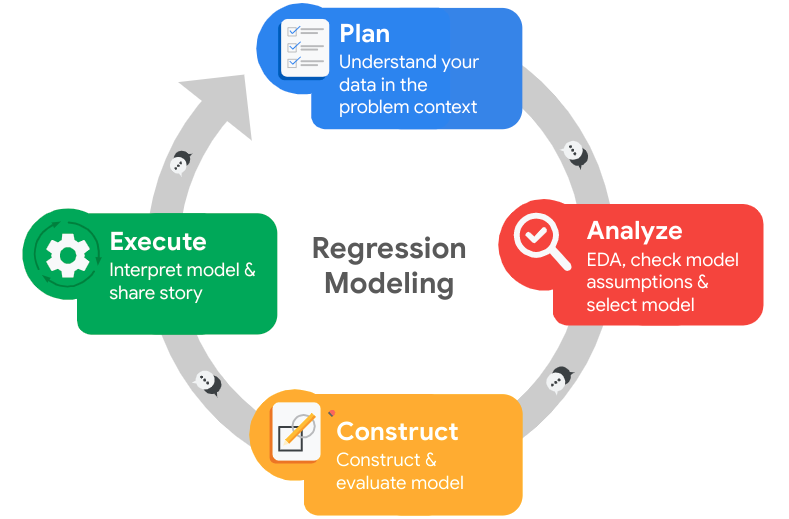

## **Pace: Plan**

Consider the questions in your PACE Strategy Document to reflect on the Plan stage.

In this stage, consider the following:

### Understand the business scenario and problem

The HR department at Salifort Motors wants to take some initiatives to improve employee satisfaction levels at the company. They collected data from employees, but now they don’t know what to do with it. They refer to you as a data analytics professional and ask you to provide data-driven suggestions based on your understanding of the data. They have the following question: what’s likely to make the employee leave the company?

Your goals in this project are to analyze the data collected by the HR department and to build a model that predicts whether or not an employee will leave the company.

If you can predict employees likely to quit, it might be possible to identify factors that contribute to their leaving. Because it is time-consuming and expensive to find, interview, and hire new employees, increasing employee retention will be beneficial to the company.

### Familiarize yourself with the HR dataset

The dataset that you'll be using in this lab contains 15,000 rows and 10 columns for the variables listed below. 

**Note:** you don't need to download any data to complete this lab. For more information about the data, refer to its source on [Kaggle](https://www.kaggle.com/datasets/mfaisalqureshi/hr-analytics-and-job-prediction?select=HR_comma_sep.csv).

Variable  |Description |
-----|-----|
satisfaction_level|Employee-reported job satisfaction level [0&ndash;1]|
last_evaluation|Score of employee's last performance review [0&ndash;1]|
number_project|Number of projects employee contributes to|
average_monthly_hours|Average number of hours employee worked per month|
time_spend_company|How long the employee has been with the company (years)
Work_accident|Whether or not the employee experienced an accident while at work
left|Whether or not the employee left the company
promotion_last_5years|Whether or not the employee was promoted in the last 5 years
Department|The employee's department
salary|The employee's salary (U.S. dollars)

💭
### Reflect on these questions as you complete the plan stage.

*  Who are your stakeholders for this project?
- What are you trying to solve or accomplish?
- What are your initial observations when you explore the data?
- What resources do you find yourself using as you complete this stage? (Make sure to include the links.)
- Do you have any ethical considerations in this stage?







https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html#sklearn.tree.DecisionTreeClassifier.feature_importances_

## Step 1. Imports

*   Import packages
*   Load dataset



### Import packages

In [12]:
# Import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


### Load dataset

`Pandas` is used to read a dataset called **`HR_capstone_dataset.csv`.**  As shown in this cell, the dataset has been automatically loaded in for you. You do not need to download the .csv file, or provide more code, in order to access the dataset and proceed with this lab. Please continue with this activity by completing the following instructions.

In [13]:
# RUN THIS CELL TO IMPORT YOUR DATA. 

# Load dataset into a dataframe
### YOUR CODE HERE ###
df0 = pd.read_csv("HR_capstone_dataset.csv")


# Display first few rows of the dataframe
df0.head(10)


,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
5,0.41,0.50,2,153,3,0,1,0,sales,low
6,0.10,0.77,6,247,4,0,1,0,sales,low
7,0.92,0.85,5,259,5,0,1,0,sales,low
8,0.89,1.00,5,224,5,0,1,0,sales,low
9,0.42,0.53,2,142,3,0,1,0,sales,low


## Step 2. Data Exploration (Initial EDA and data cleaning)

- Understand your variables
- Clean your dataset (missing data, redundant data, outliers)



### Gather basic information about the data

In [14]:
# Gather basic information about the data
df0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


### Gather descriptive statistics about the data

In [15]:
# Gather descriptive statistics about the data
df0.describe()


,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


### Rename columns

As a data cleaning step, rename the columns as needed. Standardize the column names so that they are all in `snake_case`, correct any column names that are misspelled, and make column names more concise as needed.

In [16]:
# Display all column names
print(df0.columns)


Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'Department', 'salary'],
      dtype='object')


In [17]:
# Rename columns as needed

df0 = df0.rename(columns = {'number_project' : 'number_of_projects',
                            'Work_accident': 'work_accident',
                            'Department': 'department',
                            'average_montly_hours': 'average_monthly_hours',
                            'time_spend_company' : 'tenure',
                            'last_evaluation' : 'employee_review_score'
                            
                            })

# Display all column names after the update

df0.columns

Index(['satisfaction_level', 'employee_review_score', 'number_of_projects',
       'average_monthly_hours', 'tenure', 'work_accident', 'left',
       'promotion_last_5years', 'department', 'salary'],
      dtype='object')

### Check missing values

Check for any missing values in the data.

In [18]:
# Check for missing values
df0.isna().sum()


satisfaction_level       0
employee_review_score    0
number_of_projects       0
average_monthly_hours    0
tenure                   0
work_accident            0
left                     0
promotion_last_5years    0
department               0
salary                   0
dtype: int64

### Check duplicates

Check for any duplicate entries in the data.

In [19]:
# Check for duplicates
df0.duplicated().sum()


3008

In [20]:
# Inspect some rows containing duplicates as needed
df0[df0.duplicated()]


,satisfaction_level,employee_review_score,number_of_projects,average_monthly_hours,tenure,work_accident,left,promotion_last_5years,department,salary
396,0.46,0.57,2,139,3,0,1,0,sales,low
866,0.41,0.46,2,128,3,0,1,0,accounting,low
1317,0.37,0.51,2,127,3,0,1,0,sales,medium
1368,0.41,0.52,2,132,3,0,1,0,RandD,low
1461,0.42,0.53,2,142,3,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,support,low
14995,0.37,0.48,2,160,3,0,1,0,support,low
14996,0.37,0.53,2,143,3,0,1,0,support,low
14997,0.11,0.96,6,280,4,0,1,0,support,low


In [21]:
# Drop duplicates and save resulting dataframe in a new variable as needed
df1 = df0.drop_duplicates()


# Display first few rows of new dataframe as needed
df1.head(10)


,satisfaction_level,employee_review_score,number_of_projects,average_monthly_hours,tenure,work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
5,0.41,0.50,2,153,3,0,1,0,sales,low
6,0.10,0.77,6,247,4,0,1,0,sales,low
7,0.92,0.85,5,259,5,0,1,0,sales,low
8,0.89,1.00,5,224,5,0,1,0,sales,low
9,0.42,0.53,2,142,3,0,1,0,sales,low


### Check outliers

Check for outliers in the data.

lower limit: 1.5
upper limit: 5.5
number of outliers: 824


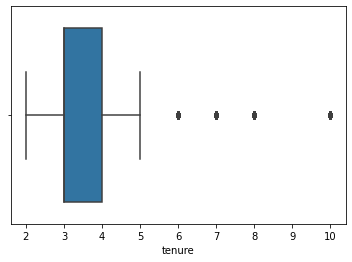

In [22]:
# Create a boxplot to visualize distribution of `tenure` and detect any outliers
sns.boxplot(df1['tenure'])

#25th percentile
percentile25 = df1['tenure'].quantile(0.25)

#75th percentile 

percentile75 = df1['tenure'].quantile(0.75)

#interquantile range:

iqr = percentile75 - percentile25

#define upper and lower limit of non outliers in tenure

upper_limit = percentile75 + 1.5 * iqr
lower_limit = percentile25 - 1.5 * iqr

print('lower limit:', lower_limit)
print('upper limit:', upper_limit)

outliers = df1[(df1['tenure'] > upper_limit) | (df1['tenure'] < lower_limit)]

print('number of outliers:', len(outliers))

In [101]:
# Determine the number of rows containing outliers
df1[df1['tenure'] >5].count()

# or:

#print('number of outliers:', len(outliers))

satisfaction_level       824
employee_review_score    824
number_of_projects       824
average_monthly_hours    824
tenure                   824
work_accident            824
left                     824
promotion_last_5years    824
department               824
salary                   824
dtype: int64

Certain types of models are more sensitive to outliers than others. When you get to the stage of building your model, consider whether to remove outliers, based on the type of model you decide to use.

# pAce: Analyze Stage
- Perform EDA (analyze relationships between variables)



💭
### Reflect on these questions as you complete the analyze stage.

- What did you observe about the relationships between variables?
- What do you observe about the distributions in the data?
- What transformations did you make with your data? Why did you chose to make those decisions?
- What are some purposes of EDA before constructing a predictive model?
- What resources do you find yourself using as you complete this stage? (Make sure to include the links.)
- Do you have any ethical considerations in this stage?




## Step 2. Data Exploration (Continue EDA)

Begin by understanding how many employees left and what percentage of all employees this figure represents.

In [26]:
# Get numbers of people who left vs. stayed
people_who_left = df1[df1['left'] ==1]
people_who_stayed = df1[df1['left'] == 0]
# Get percentages of people who left vs. stayed
percentages = df1['left'].value_counts(normalize = True) * 100
print(percentages)

0    83.39588
1    16.60412
Name: left, dtype: float64


### Data visualizations

Now, examine variables that you're interested in, and create plots to visualize relationships between variables in the data.

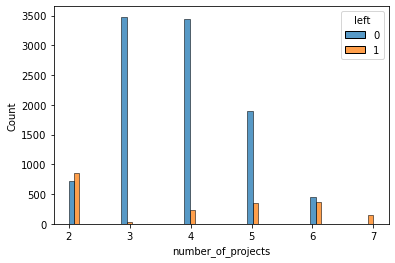

In [27]:

sns.histplot(data=df1, x = 'number_of_projects', hue = 'left',  multiple = 'dodge')


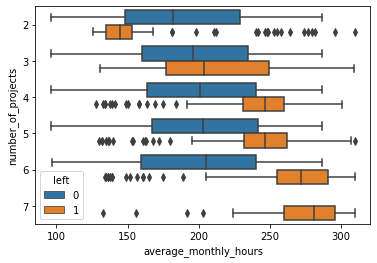

In [28]:
# average hours worked x numebr of projects
sns.boxplot(data = df1, x = 'average_monthly_hours', y = 'number_of_projects', hue = 'left', orient = 'h')


In [29]:
#How many people left the company who had done the most projects
df1[df1['number_of_projects'] == 7]['left'].value_counts()


1    145
Name: left, dtype: int64

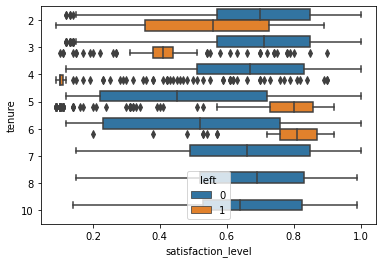

In [30]:
# boxplot satisfaction level and tenure with those who stayed and left the company
sns.boxplot(data = df1, x = 'satisfaction_level', y = 'tenure', hue = 'left', orient = 'h')


In [31]:
# Create a plot as needed
df1.groupby('left')['satisfaction_level'].agg([np.median,np.mean])

,median,mean
left,,
0,0.69,0.667365
1,0.41,0.440271


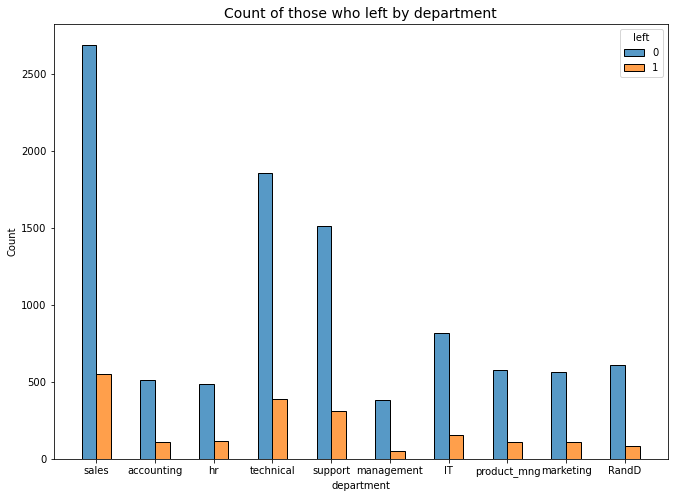

In [83]:
# Create a plot as needed
plt.figure(figsize=(11,8))
sns.histplot(data = df1, x = 'department', hue = 'left', multiple = 'dodge', shrink = .5)
plt.title('Count of those who left by department', fontsize='14');

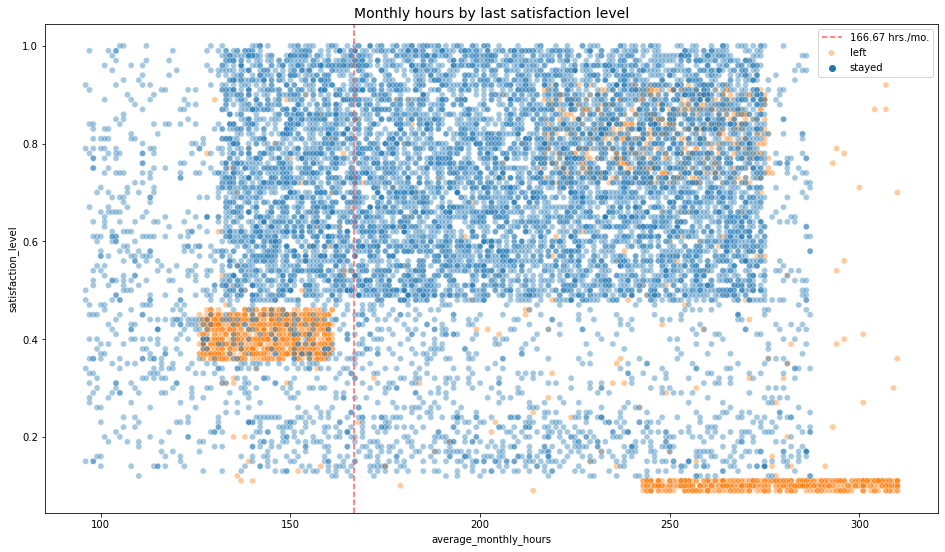

In [84]:
plt.figure(figsize=(16, 9))
sns.scatterplot(data=df1, x='average_monthly_hours', y='satisfaction_level', hue='left', alpha=0.4)
plt.axvline(x=166.67, color='#ff6361', label='166.67 hrs./mo.', ls='--')
plt.legend(labels=['166.67 hrs./mo.', 'left', 'stayed'])
plt.title('Monthly hours by last satisfaction level', fontsize='14');

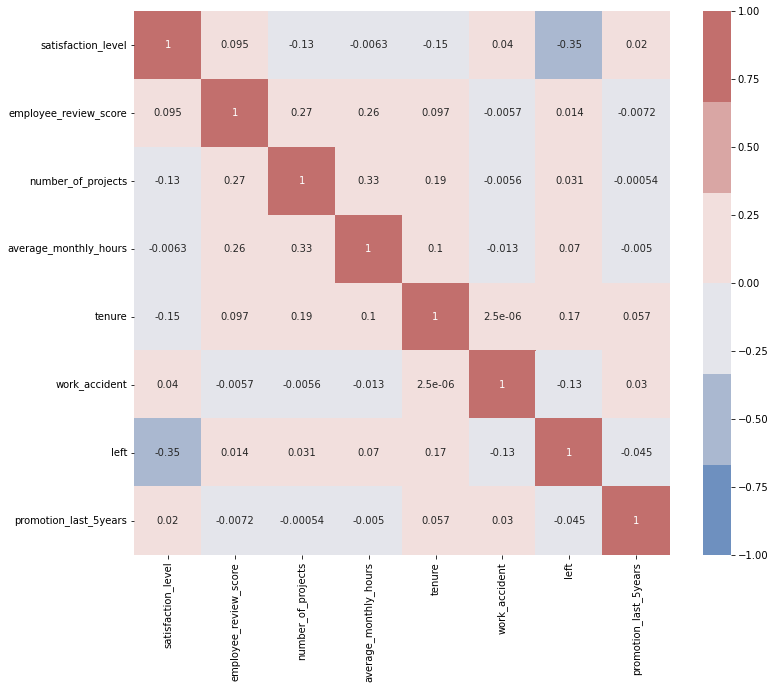

In [32]:
#Examine correlations between variables
plt.figure(figsize = (12,10))
sns.heatmap(data = df1.corr(), vmin=-1, vmax=1, cmap=sns.color_palette("vlag"), annot = True)


### Insights

The correlation heatmap confirms that the number of projects, monthly hours, and evaluation scores all have some positive correlation with each other, and whether an employee leaves is negatively correlated with their satisfaction level.

Leaving the company is tied to long hours or a high number of projects. 

Those who have spent more than 6 years tend not to leave. 

Employees in sales and tenchincal are double or more than other departments. Sales can be voluntile so makes sense. 

# paCe: Construct Stage
- Determine which models are most appropriate
- Construct the model
- Confirm model assumptions
- Evaluate model results to determine how well your model fits the data


🔎
## Recall model assumptions

**Logistic Regression model assumptions**
- Outcome variable is categorical
- Observations are independent of each other
- No severe multicollinearity among X variables
- No extreme outliers
- Linear relationship between each X variable and the logit of the outcome variable
- Sufficiently large sample size





💭
### Reflect on these questions as you complete the constructing stage.

- Do you notice anything odd?
- Which independent variables did you choose for the model and why?
- Are each of the assumptions met?
- How well does your model fit the data?
- Can you improve it? Is there anything you would change about the model?
- What resources do you find yourself using as you complete this stage? (Make sure to include the links.)
- Do you have any ethical considerations in this stage?



## Step 3. Model Building, Step 4. Results and Evaluation
- Fit a model that predicts the outcome variable using two or more independent variables
- Check model assumptions
- Evaluate the model

### Identify the type of prediction task.

To predict if employee will leave company. A catergorical variable.

### Identify the types of models most appropriate for this task.

Whether an employee leaves the company is categorical, I could either build a Logistic Regression model, or a Tree-based Machine Learning model.I will do a Tree based Machine Learning modeling 

### Modeling

Add as many cells as you need to conduct the modeling process.

In [34]:
#copy dataframe:
df_enc = df1.copy()

In [35]:
# Each column should be numeric - Salary is categorical so needs to be ordinal encoding - The rest can be one-hot encoding:

In [36]:
#encode salary as ordinal numeric coding
salary_mapping = {
    'low': 1,
    'medium': 2,
    'high': 3
}

df_enc['salary'] = df_enc['salary'].map(salary_mapping)


In [37]:
df_enc.head()

,satisfaction_level,employee_review_score,number_of_projects,average_monthly_hours,tenure,work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,1
1,0.80,0.86,5,262,6,0,1,0,sales,2
2,0.11,0.88,7,272,4,0,1,0,sales,2
3,0.72,0.87,5,223,5,0,1,0,sales,1
4,0.37,0.52,2,159,3,0,1,0,sales,1


In [38]:
# dummy encode department for model
df_enc = pd.get_dummies(df_enc, drop_first = False )

In [39]:
df_enc.head()

,satisfaction_level,employee_review_score,number_of_projects,average_monthly_hours,tenure,work_accident,left,promotion_last_5years,salary,department_IT,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical
0,0.38,0.53,2,157,3,0,1,0,1,0,0,0,0,0,0,0,1,0,0
1,0.80,0.86,5,262,6,0,1,0,2,0,0,0,0,0,0,0,1,0,0
2,0.11,0.88,7,272,4,0,1,0,2,0,0,0,0,0,0,0,1,0,0
3,0.72,0.87,5,223,5,0,1,0,1,0,0,0,0,0,0,0,1,0,0
4,0.37,0.52,2,159,3,0,1,0,1,0,0,0,0,0,0,0,1,0,0


In [40]:
# import packages for Decision tree and random forest


from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier 


#import metrics

from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay, classification_report
from sklearn.tree import plot_tree
from sklearn.metrics import roc_auc_score, roc_curve

#import data modelling
from xgboost import XGBClassifier
from xgboost import XGBRegressor
from xgboost import plot_importance

In [41]:
y = df_enc['left']

y.head(10)

0    1
1    1
2    1
3    1
4    1
5    1
6    1
7    1
8    1
9    1
Name: left, dtype: int64

In [42]:
X = df_enc.drop('left', axis=1)

X.head()

,satisfaction_level,employee_review_score,number_of_projects,average_monthly_hours,tenure,work_accident,promotion_last_5years,salary,department_IT,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical
0,0.38,0.53,2,157,3,0,0,1,0,0,0,0,0,0,0,1,0,0
1,0.80,0.86,5,262,6,0,0,2,0,0,0,0,0,0,0,1,0,0
2,0.11,0.88,7,272,4,0,0,2,0,0,0,0,0,0,0,1,0,0
3,0.72,0.87,5,223,5,0,0,1,0,0,0,0,0,0,0,1,0,0
4,0.37,0.52,2,159,3,0,0,1,0,0,0,0,0,0,0,1,0,0


In [43]:
# split the data

X_train, X_test, y_train, y_test = train_test_split(X, y,test_size = 0.25, stratify = y, random_state=0 )

In [44]:
# Instantiate model
decision_tree = DecisionTreeClassifier(random_state=0)

#define hyperparamaters to result in most optimal model
cv_param = {'max_depth' : [4, 6, 8, None],
           'min_samples_leaf' : [1, 2, 5],
           'min_samples_split':[2, 4, 6]
           }

#dictionary of scoring metrics to capture
scoring = {'accuracy', 'precision', 'recall', 'f1', 'roc_auc'}

# Instantiate Gridsearch - 4 fold

decision_tree1 = GridSearchCV(decision_tree, cv_param, scoring = scoring, cv=4, refit='roc_auc')

In [45]:
%%time
# fit decision tree model to trianing data

decision_tree1.fit(X_train, y_train)


CPU times: user 3.07 s, sys: 0 ns, total: 3.07 s
Wall time: 3.07 s


GridSearchCV(cv=4, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=0, splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid={'max_depth': [4, 6, 8, None],
                         'min_samples_leaf': [1, 2, 5],
                

In [46]:
# display best parameters for decision tree
decision_tree1.best_estimator_

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=4, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

In [47]:
#display best score

decision_tree1.best_score_

0.969819392792457

In [48]:
def make_results(model_name:str, model_object, metric:str):
    
    metric_dict = {'auc': 'mean_test_roc_auc',
                   'precision': 'mean_test_precision',
                   'recall': 'mean_test_recall',
                   'f1': 'mean_test_f1',
                   'accuracy': 'mean_test_accuracy'
                  }
    
    cv_results = pd.DataFrame(model_object.cv_results_)
    
    
    best_estimator_results = cv_results.iloc[cv_results[metric_dict[metric]].idxmax(), :]
    
    auc = best_estimator_results.mean_test_roc_auc
    f1 = best_estimator_results.mean_test_f1
    recall = best_estimator_results.mean_test_recall
    precision = best_estimator_results.mean_test_precision
    accuracy = best_estimator_results.mean_test_accuracy
  
    # Create table of results
    table = pd.DataFrame()
    table = pd.DataFrame({'model': [model_name],
                          'precision': [precision],
                          'recall': [recall],
                          'F1': [f1],
                          'accuracy': [accuracy],
                          'auc': [auc]
                        })
  
    return table

In [50]:
decision_tree1_results = make_results('decision tree cv', decision_tree1, 'auc')
decision_tree1_results

,model,precision,recall,F1,accuracy,auc
0,decision tree cv,0.914552,0.916949,0.915707,0.971978,0.969819


In [51]:
# Instantiate model
random_forest = RandomForestClassifier(random_state=0)

# Assign a dictionary of hyperparameters to search over
cv_params = {'max_depth': [3,5, None], 
             'max_features': [1.0],
             'max_samples': [0.7, 1.0],
             'min_samples_leaf': [1,2,3],
             'min_samples_split': [2,3,4],
             'n_estimators': [300, 500],
             }  

# Assign a dictionary of scoring metrics to capture
scoring = {'accuracy', 'precision', 'recall', 'f1', 'roc_auc'}

# Instantiate GridSearch
random_forest1 = GridSearchCV(random_forest, cv_params, scoring=scoring, cv=4, refit='roc_auc')

In [52]:
%%time
# fit decision tree model to trianing data

random_forest1.fit(X_train, y_train)

CPU times: user 9min 44s, sys: 1.16 s, total: 9min 45s
Wall time: 9min 46s


GridSearchCV(cv=4, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,...
                                              verbose=0, warm_start=False),
             iid='deprecated', n_jo

In [53]:
random_forest1.best_estimator_

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=5, max_features=1.0,
                       max_leaf_nodes=None, max_samples=0.7,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=4,
                       min_weight_fraction_leaf=0.0, n_estimators=500,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [54]:
random_forest1.best_score_

0.9804250949807172

In [55]:
# compare cross validation (cv) results
random_forest1_results = make_results('random forest cv', random_forest1, 'auc')
print(decision_tree1_results)
print(random_forest1_results)

              model  precision    recall        F1  accuracy       auc
0  decision tree cv   0.914552  0.916949  0.915707  0.971978  0.969819
              model  precision    recall        F1  accuracy       auc
0  random forest cv   0.950023  0.915614  0.932467  0.977983  0.980425


In [56]:
# Generate a table of test scores using test data with random forest

def get_scores(model_name:str, model, X_test_data, y_test_data):

   

    preds = model.best_estimator_.predict(X_test_data)

    auc = roc_auc_score(y_test_data, preds)
    accuracy = accuracy_score(y_test_data, preds)
    precision = precision_score(y_test_data, preds)
    recall = recall_score(y_test_data, preds)
    f1 = f1_score(y_test_data, preds)

    table = pd.DataFrame({'model': [model_name],
                          'precision': [precision], 
                          'recall': [recall],
                          'f1': [f1],
                          'accuracy': [accuracy],
                          'AUC': [auc]
                         })
  
    return table

In [57]:
random_forest1_test_scores = get_scores('random forest1 test', random_forest1, X_test, y_test)
random_forest1_test_scores

,model,precision,recall,f1,accuracy,AUC
0,random forest1 test,0.964211,0.919679,0.941418,0.980987,0.956439


                   Feature  Importance
0       satisfaction_level    0.493518
2       number_of_projects    0.164313
1    employee_review_score    0.146839
4                   tenure    0.116408
3    average_monthly_hours    0.077554
9         department_RandD    0.000244
7                   salary    0.000209
17    department_technical    0.000181
8            department_IT    0.000152
13    department_marketing    0.000151
16      department_support    0.000125
11           department_hr    0.000122
10   department_accounting    0.000095
15        department_sales    0.000053
5            work_accident    0.000013
14  department_product_mng    0.000010
12   department_management    0.000010
6    promotion_last_5years    0.000002


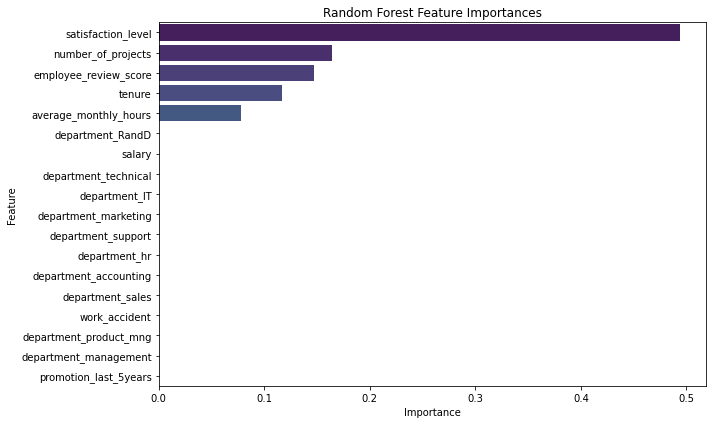

In [58]:
#Get the trained Random Forest model from GridSearchCV

best_rf = random_forest1.best_estimator_

# Get feature importances from the actual Random Forest model

feature_importances = best_rf.feature_importances_

# Create a DataFrame with feature names and importance

feat_imp_df = pd.DataFrame({
    'Feature': X_test.columns,
    'Importance': feature_importances
})

# Sort by importance

feat_imp_df = feat_imp_df.sort_values(by='Importance', ascending=False)

# Display table

print(feat_imp_df)

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feat_imp_df, palette='viridis')
plt.title('Random Forest Feature Importances')
plt.tight_layout()
plt.show()

In [60]:
# Drop `satisfaction_level` and run both tree and random forest without it.
df2 = df_enc.drop('satisfaction_level', axis=1)

# Display first few rows of new dataframe
df2.head()

,employee_review_score,number_of_projects,average_monthly_hours,tenure,work_accident,left,promotion_last_5years,salary,department_IT,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical
0,0.53,2,157,3,0,1,0,1,0,0,0,0,0,0,0,1,0,0
1,0.86,5,262,6,0,1,0,2,0,0,0,0,0,0,0,1,0,0
2,0.88,7,272,4,0,1,0,2,0,0,0,0,0,0,0,1,0,0
3,0.87,5,223,5,0,1,0,1,0,0,0,0,0,0,0,1,0,0
4,0.52,2,159,3,0,1,0,1,0,0,0,0,0,0,0,1,0,0


In [61]:
# Isolate the outcome variable
y = df2['left']

# Select the features
X = df2.drop('left', axis=1)

In [62]:
# Create test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, stratify=y, random_state=0)

In [63]:
# Instantiate model
decision_tree2 = DecisionTreeClassifier(random_state=0)

# Assign a dictionary of hyperparameters to search over
cv_params = {'max_depth':[4, 6, 8, None],
             'min_samples_leaf': [2, 5, 1],
             'min_samples_split': [2, 4, 6]
             }

# Assign a dictionary of scoring metrics to capture
scoring = {'accuracy', 'precision', 'recall', 'f1', 'roc_auc'}

# Instantiate GridSearch
decision_tree2_1 = GridSearchCV(decision_tree2, cv_params, scoring=scoring, cv=4, refit='roc_auc')

In [64]:
%%time
decision_tree2_1.fit(X_train, y_train)

CPU times: user 2.85 s, sys: 3.99 ms, total: 2.85 s
Wall time: 2.85 s


GridSearchCV(cv=4, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=0, splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid={'max_depth': [4, 6, 8, None],
                         'min_samples_leaf': [2, 5, 1],
                

In [65]:
decision_tree2_1.best_params_

{'max_depth': 6, 'min_samples_leaf': 2, 'min_samples_split': 6}

In [66]:
decision_tree2_1.best_score_

0.9644563862883687

In [67]:
# Get all CV scores and compare models with and without satisfaction
decision_tree2_1_results = make_results('decision tree2 cv', decision_tree2_1, 'auc')
print(decision_tree1_results)
print(decision_tree2_1_results)

              model  precision    recall        F1  accuracy       auc
0  decision tree cv   0.914552  0.916949  0.915707  0.971978  0.969819
               model  precision    recall        F1  accuracy       auc
0  decision tree2 cv   0.902176  0.904894  0.903168  0.967752  0.964456


In [74]:
# Instantiate model
random_forest2 = RandomForestClassifier(random_state=0)

# Assign a dictionary of hyperparameters to search over
cv_params = {'max_depth': [3,5, None], 
             'max_features': [1.0],
             'max_samples': [0.7, 1.0],
             'min_samples_leaf': [1,2,3],
             'min_samples_split': [2,3,4],
             'n_estimators': [300, 500],
             }  

# Assign a dictionary of scoring metrics to capture
scoring = {'accuracy', 'precision', 'recall', 'f1', 'roc_auc'}

# Instantiate GridSearch
random_forest2_1 = GridSearchCV(random_forest2, cv_params, scoring=scoring, cv=4, refit='roc_auc')

In [75]:
%%time
random_forest2_1.fit(X_train, y_train) 

CPU times: user 8min 57s, sys: 1.19 s, total: 8min 58s
Wall time: 8min 59s


GridSearchCV(cv=4, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,...
                                              verbose=0, warm_start=False),
             iid='deprecated', n_jo

In [76]:
random_forest2_1_results = make_results('random forest cv 2', random_forest2_1, 'auc')
print(decision_tree2_1_results)
print(random_forest1_results)
print(random_forest2_1_results)

               model  precision    recall        F1  accuracy       auc
0  decision tree2 cv   0.902176  0.904894  0.903168  0.967752  0.964456
              model  precision    recall        F1  accuracy       auc
0  random forest cv   0.950023  0.915614  0.932467  0.977983  0.980425
                model  precision    recall       F1  accuracy       auc
0  random forest cv 2   0.906207  0.904892  0.90547  0.968642  0.973968


In [ ]:
# new random forest slightly worse than previous (with satisfaction) but better than new decision tree according to auc

In [77]:
# NOW GET SCORES FROM NEW TEST DATA (WITHOUT SATISFACTION)
random_forest2_test_scores = get_scores('random forest2 test', random_forest2_1, X_test, y_test)
random_forest2_test_scores

,model,precision,recall,f1,accuracy,AUC
0,random forest2 test,0.909091,0.903614,0.906344,0.968979,0.942807


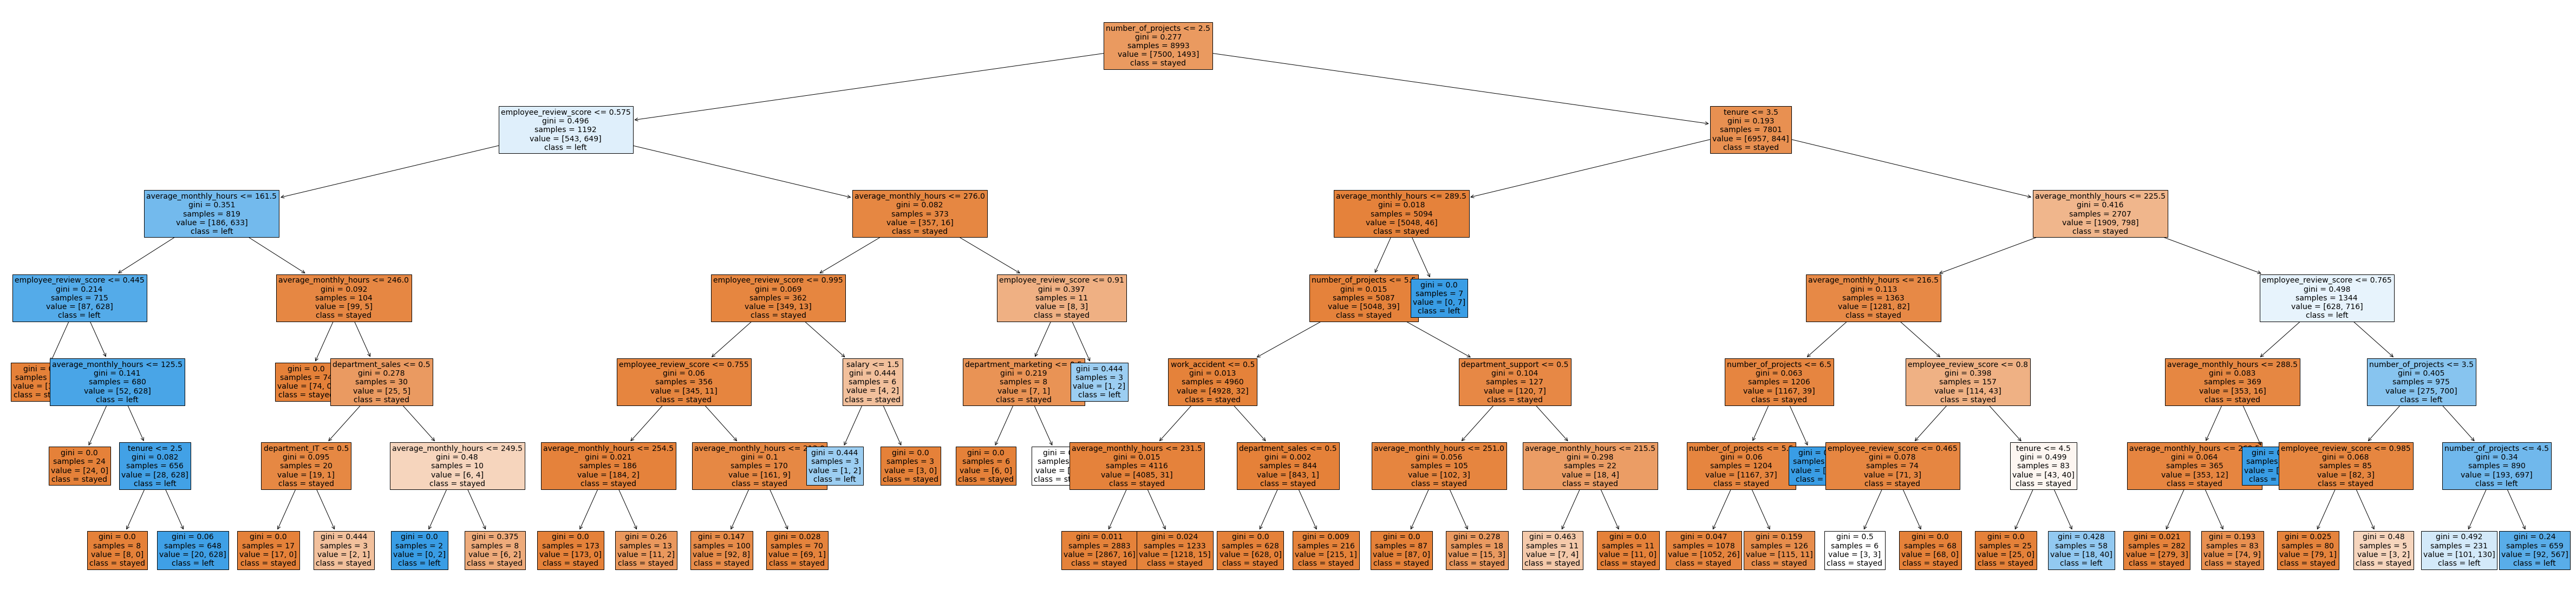

In [80]:
# Plot the tree
plt.figure(figsize=(85,20))
plot_tree(decision_tree2_1.best_estimator_, max_depth=6, fontsize=14, feature_names=X.columns, 
          class_names={0:'stayed', 1:'left'}, filled=True);
plt.show()

In [81]:
#tree2_importances = pd.DataFrame(tree2.best_estimator_.feature_importances_, columns=X.columns)
decision_tree2_1_importances = pd.DataFrame(decision_tree2_1.best_estimator_.feature_importances_, 
                                 columns=['gini_importance'], 
                                 index=X.columns
                                )
decision_tree2_1_importances = decision_tree2_1_importances.sort_values(by='gini_importance', ascending=False)

# Only extract the features with importances > 0
decision_tree2_1_importances = decision_tree2_1_importances[decision_tree2_1_importances['gini_importance'] != 0]
decision_tree2_1_importances

,gini_importance
employee_review_score,0.305009
average_monthly_hours,0.264195
number_of_projects,0.264194
tenure,0.163939
department_sales,0.000840
salary,0.000683
department_support,0.000437
department_marketing,0.000384
department_IT,0.000290
work_accident,0.000029


                   Feature  Importance
1       number_of_projects    0.301812
2    average_monthly_hours    0.286864
0    employee_review_score    0.276197
3                   tenure    0.132595
15      department_support    0.000713
14        department_sales    0.000473
6                   salary    0.000412
16    department_technical    0.000405
9    department_accounting    0.000182
7            department_IT    0.000161
8         department_RandD    0.000093
13  department_product_mng    0.000026
11   department_management    0.000022
4            work_accident    0.000016
12    department_marketing    0.000013
10           department_hr    0.000012
5    promotion_last_5years    0.000005


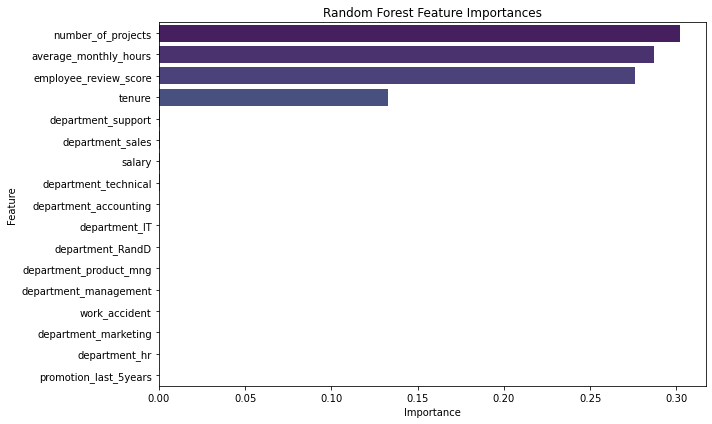

In [78]:
#Get the trained Random Forest model from GridSearchCV

best_rf2 = random_forest2_1.best_estimator_

# Get feature importances from the actual Random Forest model

feature_importances = best_rf2.feature_importances_

# Create a DataFrame with feature names and importance

feat_imp_df = pd.DataFrame({
    'Feature': X_test.columns,
    'Importance': feature_importances
})

# Sort by importance

feat_imp_df = feat_imp_df.sort_values(by='Importance', ascending=False)

# Display table

print(feat_imp_df)

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feat_imp_df, palette='viridis')
plt.title('Random Forest Feature Importances')
plt.tight_layout()
plt.show()

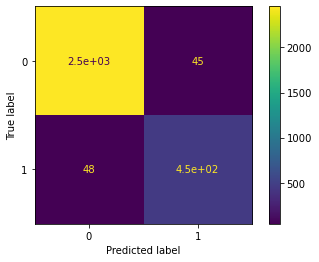

In [79]:
preds = random_forest2_1.best_estimator_.predict(X_test)
cm = confusion_matrix(y_test, preds, labels=random_forest2_1.classes_)

# Plot confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                             display_labels=random_forest2_1.classes_)

disp.plot()

# pacE: Execute Stage
- Interpret model performance and results
- Share actionable steps with stakeholders



✏
## Recall evaluation metrics

- **AUC** is the area under the ROC curve; it's also considered the probability that the model ranks a random positive example more highly than a random negative example.
- **Precision** measures the proportion of data points predicted as True that are actually True, in other words, the proportion of positive predictions that are true positives.
- **Recall** measures the proportion of data points that are predicted as True, out of all the data points that are actually True. In other words, it measures the proportion of positives that are correctly classified.
- **Accuracy** measures the proportion of data points that are correctly classified.
- **F1-score** is an aggregation of precision and recall.






💭
### Reflect on these questions as you complete the executing stage.

- What key insights emerged from your model(s)?
- What business recommendations do you propose based on the models built?
- What potential recommendations would you make to your manager/company?
- Do you think your model could be improved? Why or why not? How?
- Given what you know about the data and the models you were using, what other questions could you address for the team?
- What resources do you find yourself using as you complete this stage? (Make sure to include the links.)
- Do you have any ethical considerations in this stage?



## Step 4. Results and Evaluation
- Interpret model
- Evaluate model performance using metrics
- Prepare results, visualizations, and actionable steps to share with stakeholders




### Summary of model results

After conducting feature engineering, the decision tree model achieved AUC of 94.2%, precision of 90.9%, recall of 90.3%, f1-score of 90.6%, and accuracy of 96.8%, on the test set.  



### Conclusion, Recommendations, Next Steps

To retain employees, the following recommendations could be presented to the stakeholders:

Limit the number of projects that employees can work on.

Either reward employees for working longer hours, or don't require them to do so.

Consider promoting employees who have been with the company for atleast four years, or conduct further investigation about why four-year tenured employees are so dissatisfied.


**Congratulations!** You've completed this lab. However, you may not notice a green check mark next to this item on Coursera's platform. Please continue your progress regardless of the check mark. Just click on the "save" icon at the top of this notebook to ensure your work has been logged.